PHASE THREE: Applying Clustering Algorithms to Find Geographically Similar Headlines

    Objective: Cluster (find groups of) headlines based on the geographic coordinates using both k-means clustering and DBSCAN. Visualize the clusters on a world map to check the results. Try different parameters and distance measures in the algorithms to produce better clusters.

Workflow:

Step one

    import necessary modules: matplotlib.pyplot/numpy/pandas/mpl_toolkits.basemap/sklearn.cluster

In [5]:
from math import radians, cos, sin, asin, sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import DBSCAN, KMeans

Step Two

    Load in the necessary data and set some initial color value.

In [6]:
df = pd.read_csv("database/match_data.csv")


colors = [
    "k",
    "r",
    "y",
    "g",
    "c",
    "b",
    "m",
    "chocolate",
    "darkorange",
    "lime",
    "navy",
    "deeppink",
]

Step Three

    Apply k-means clustering algorithm to the latitude and longitude of each headline and Assign the cluster labels as another column in the DataFrame. Here we choose 11 clusters to be consistent with the number of clusters given by DBSCAN.

In [7]:
kmeans_model = KMeans(n_clusters=11)
kmeans_model.fit(df[["latitude", "longitude"]])
df["kmeans_label"] = kmeans_model.labels_

Step Four 

    Visualize the clusters on a world map using the Basemap library. Color the headlines by the cluster labels.(k-means)

This is the map using the k-means clustering algorithm.


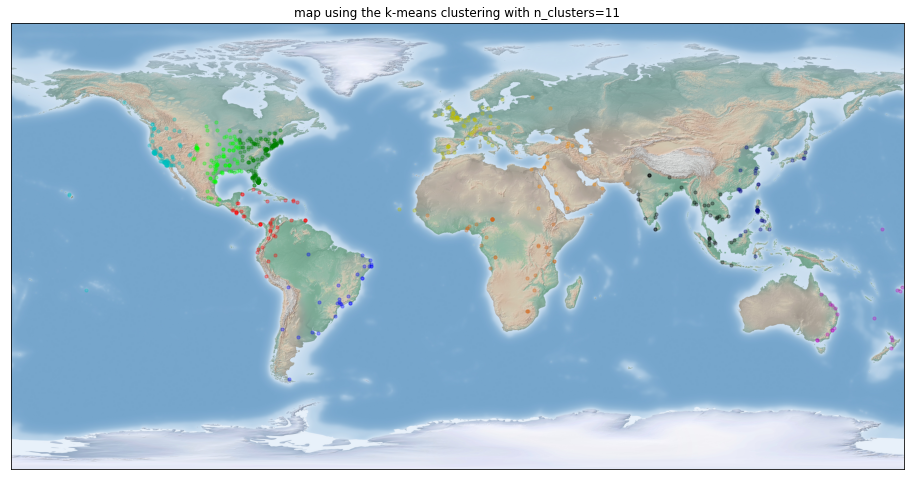

In [8]:
# Plotting the points on Basemap with the k-means algorithm (11 clusters)
print("This is the map using the k-means clustering algorithm.")
map_plotter = Basemap()
fig = plt.figure(figsize=(16, 9))
cluster_vals = {}
for i in range(kmeans_model.n_clusters):
    cluster_vals[str(i) + "_long"] = []
    cluster_vals[str(i) + "_lat"] = []
for index in df.index:
    cluster_vals[str(df["kmeans_label"][index]) + "_long"].append(
        df["longitude"][index]
    )
    cluster_vals[str(df["kmeans_label"][index]) +
                 "_lat"].append(df["latitude"][index])
for target in range(kmeans_model.n_clusters):
    map_plotter.scatter(
        cluster_vals[str(target) + "_long"],
        cluster_vals[str(target) + "_lat"],
        latlon=True,
        color=colors[target],
        alpha=0.3,
        s=10,
    )
    map_plotter.shadedrelief()
plt.title(
    f"map using the k-means clustering with n_clusters={kmeans_model.n_clusters}")
plt.savefig(f"database\\k-means_{kmeans_model.n_clusters}_clusters.png")
plt.show()

Step Five

    Defining the distance function (Great Circle Distance)

In [9]:
# Defining the distance function (Great Circle Distance)
def haversine(point_a, point_b):
    lon1, lat1, lon2, lat2 = map(
        radians, [point_a[0], point_a[1], point_b[0], point_b[1]]
    )
    a = (
        sin((lat2 - lat1) / 2) ** 2
        + cos(lat1) * cos(lat2) * sin((lon2 - lon1) / 2) ** 2
    )
    return 12742 * asin(sqrt(a))

Step Six

    Apply DBSCAN algorithm to the latitude and longitude of each headline and Assign the cluster labels as another column on the DataFrame.

In [10]:
# Implementing the DBSCAN Algorithm
points = []
for index in df.index:
    points.append([df["longitude"][index], df["latitude"][index]])
dbscan_model = DBSCAN(eps=1000, min_samples=3, metric=haversine, n_jobs=-1)
clusters = dbscan_model.fit_predict(points)
df["dbscan_label"] = clusters

Step Seven

    Remove the outliers.

In [11]:
# Removing the outliers
df_dbscan_valid = df.loc[
    df["dbscan_label"] != -1, ["latitude", "longitude", "dbscan_label"]
]

Step Eight

    Visualize the clusters on a world map using the Basemap library. Color the headlines by the cluster assignment.(DBSCAN)

This is the map using the DBSCAN clustering algorithm.


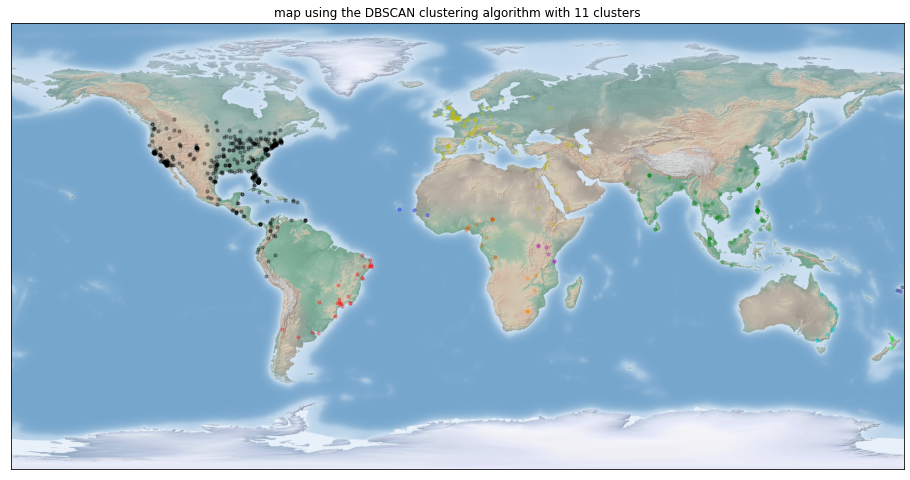

In [13]:
# Plotting the points on Basemap with the DBSCAN Algorithm (11 clusters)
print("This is the map using the DBSCAN clustering algorithm.")
fig = plt.figure(figsize=(16, 9))
cluster_vals = {}
valid_dbscan_labels = np.unique(dbscan_model.labels_)[1:]
for dbscan_label in valid_dbscan_labels:
    cluster_vals[str(dbscan_label) + "_long"] = []
    cluster_vals[str(dbscan_label) + "_lat"] = []
for index in df_dbscan_valid.index:
    cluster_vals[str(df_dbscan_valid["dbscan_label"][index]) + "_long"].append(
        df_dbscan_valid["longitude"][index]
    )
    cluster_vals[str(df_dbscan_valid["dbscan_label"][index]) + "_lat"].append(
        df_dbscan_valid["latitude"][index]
    )
for target in valid_dbscan_labels:
    map_plotter.scatter(
        cluster_vals[str(target) + "_long"],
        cluster_vals[str(target) + "_lat"],
        latlon=True,
        alpha=0.3,
        color=colors[target],
        s=10,
    )
    map_plotter.shadedrelief()
plt.title(
    f"map using the DBSCAN clustering algorithm with {len(valid_dbscan_labels)} clusters"
)
plt.savefig(f"database\\DBSCAN_{len(valid_dbscan_labels)}_clusters.png")
plt.show()

Step Nine

    Saving table consisting of the k-means and DBSCAN label for all geographical points.

In [14]:
print(
    "Saving table consisting of the k-means and DBSCAN label for all geographical points."
)
print(df)
print(df.info())
df.to_csv("database\\cluster_result.csv", index=False)

Saving table consisting of the k-means and DBSCAN label for all geographical points.
                                              headline           city  \
0                             Zika Outbreak Hits Miami          Miami   
1                      Could Zika Reach New York City?  New York City   
2                    First Case of Zika in Miami Beach    Miami Beach   
3              Mystery Virus Spreads in Recife, Brazil         Recife   
4              Dallas man comes down with case of Zika         Dallas   
..                                                 ...            ...   
617  Rumors about Rabies spreading in Jerusalem hav...      Jerusalem   
618              More Zika patients reported in Indang         Indang   
619  Suva authorities confirmed the spread of Rotav...           Suva   
620         More Zika patients reported in Bella Vista    Bella Vista   
621                     Zika Outbreak in Wichita Falls  Wichita Falls   

           country  longitude  latitud